# Data Cleansing Projecton Zillow Data

We’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset, which is available in the [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1). This Zillow dataset contains abundant missing data and will provide us a good environment to practice our skills on data cleaning. 

This step-by-step mini project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [2]:
properties = pd.read_csv('Data/properties_2016.csv')
train = pd.read_csv("Data/train_2016_v2.csv")

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [3]:
df_train = train.merge(properties, how='left', on='parcelid')
df_train.drop(['parcelid', 'transactiondate'], axis=1,inplace=True)

In [4]:
df_train.head(5)

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [5]:
df_train.shape

(90275, 58)

#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [6]:
missing_df = df_train.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

In [7]:
missing_df.head(5)

,column_name,missing_count
53,landtaxvaluedollarcnt,1
51,taxvaluedollarcnt,1
32,propertycountylandusecode,1
54,taxamount,6
39,regionidzip,35


#### 3.(b) Draw a horizontal bar plot to visualize it. Following is an example to show how this figure may look like:

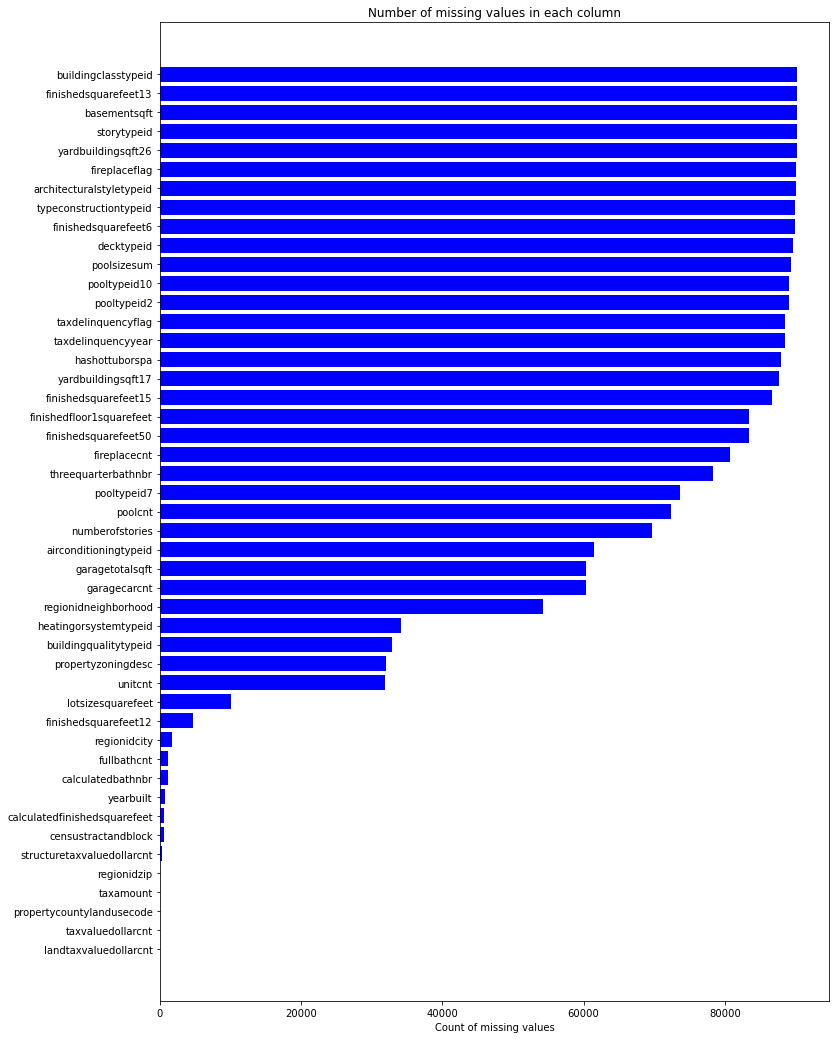

In [8]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [9]:
## Classify the features into categorical and numerical fearures
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in df_train.columns if x not in catcols]

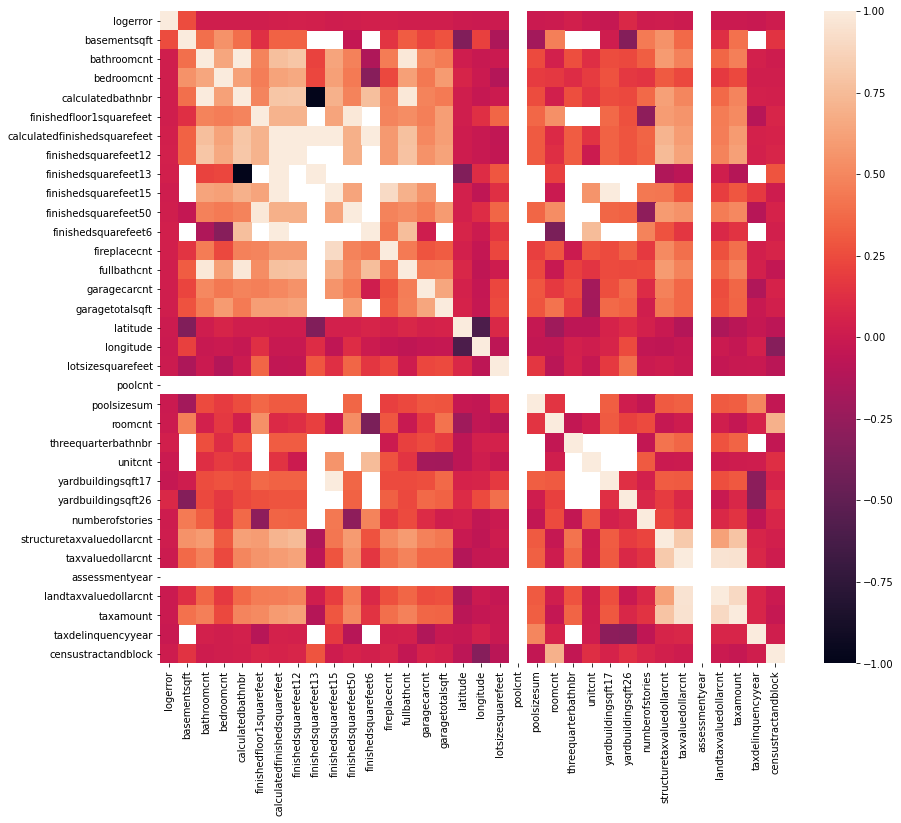

In [10]:
plt.figure(figsize = (14,12))
sns.heatmap(data=df_train[numcols].corr())
plt.show()

#### 5. From the results from Step 4, list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [11]:
dropcols = []
## 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15' 
## 'finishedsquarefeet6' has strong correlations, but 'calculatedfinishedsquarefeet' doesn't have missing value, so 
## we keep it and delete the rest
dropcols.append('finishedsquarefeet12')
dropcols.append('finishedsquarefeet13')
dropcols.append('finishedsquarefeet15')
dropcols.append('finishedsquarefeet6')

In [12]:
## finishedsquarefeet50 and finishedfloor1squarefeet are the exactly the same information according to the dictionary descriptions, 
## lets remove finishedsquarefeet50 considering it has more missing values
dropcols.append('finishedsquarefeet50')

In [13]:
##'bathroomcnt' and 'calculatedbathnbr' and 'fullbathcnt' have high relationship as well.
## We keep'bathroomcnt' as has no missing values
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [14]:
index = df_train.hashottuborspa.isnull()
df_train.loc[index,'hashottuborspa'] = "None"

(b) Assume if the pooltype id and its related features is null then pool/hottub doesnt exist.

In [15]:
index = df_train.pooltypeid2.isnull()
df_train.loc[index,'pooltypeid2'] = 0

In [16]:
index = df_train.pooltypeid7.isnull()
df_train.loc[index,'pooltypeid7'] = 0

In [17]:
index = df_train.pooltypeid10.isnull()
df_train.loc[index,'pooltypeid10'] = 0

In [18]:
index = df_train.poolcnt.isnull()
df_train.loc[index,'poolcnt'] = 0

(c) Tax deliquency flag - assume if it is null then doesn't exist

In [19]:
index = df_train.taxdelinquencyflag.isnull()
df_train.loc[index,'taxdelinquencyflag'] = "None"

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [20]:
index = df_train.garagecarcnt.isnull()
df_train.loc[index,'garagecarcnt'] = 0

In [21]:
index = df_train.garagetotalsqft.isnull()
df_train.loc[index,'garagetotalsqft'] = 0

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [22]:
#Fill in those properties that have a pool with median pool value
poolsizesum_median = df_train.loc[df_train['poolcnt'] > 0, 'poolsizesum'].median()
df_train.loc[(df_train['poolcnt'] > 0) & (df_train['poolsizesum'].isnull()), 'poolsizesum'] = poolsizesum_median

#If it doesn't have a pool then poolsizesum is 0 by default
df_train.loc[(df_train['poolcnt'] == 0), 'poolsizesum'] = 0

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplace flag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [23]:
df_train['fireplaceflag']= "No"
df_train.loc[df_train['fireplacecnt']>0,'fireplaceflag']= "Yes"

index = df_train.fireplacecnt.isnull()
df_train.loc[index,'fireplacecnt'] = 0

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [24]:
index = df_train.airconditioningtypeid.isnull()
df_train.loc[index,'airconditioningtypeid'] = 1

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [25]:
index = df_train.heatingorsystemtypeid.isnull()
df_train.loc[index,'heatingorsystemtypeid'] = 2

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [26]:
missingvalues_prop = (df_train.isnull().sum()/len(df_train)).reset_index()  
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)
missingvaluescols = missingvalues_prop[missingvalues_prop['proportion'] > 0.97].field.tolist()
dropcols = dropcols + missingvaluescols
df_train = df_train.drop(dropcols, axis=1)

                           field  proportion
6            buildingclasstypeid    0.999823
13          finishedsquarefeet13    0.999634
3                   basementsqft    0.999524
41                   storytypeid    0.999524
46            yardbuildingsqft26    0.998948
2       architecturalstyletypeid    0.997109
43        typeconstructiontypeid    0.996688
16           finishedsquarefeet6    0.995336
9                     decktypeid    0.992711
56            taxdelinquencyyear    0.980249
45            yardbuildingsqft17    0.970690
14          finishedsquarefeet15    0.960521
15          finishedsquarefeet50    0.924054
10      finishedfloor1squarefeet    0.924054
42           threequarterbathnbr    0.866973
48               numberofstories    0.772141
38          regionidneighborhood    0.601086
7          buildingqualitytypeid    0.364564
34            propertyzoningdesc    0.354052
44                       unitcnt    0.353608
26             lotsizesquarefeet    0.112434
12        